## Import Library


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix as cm, classification_report as cr
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import silhouette_score, davies_bouldin_score,calinski_harabasz_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import normalized_mutual_info_score
from sklearn.metrics import homogeneity_score, completeness_score,v_measure_score

## Import Dataset


In [25]:
df = pd.read_csv('Steel_industry_data.csv')

### Menampilkan 5 Data Teratas

In [26]:
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


### Menampilkan Informasi dari Dataset

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

### Pengecekan apakah ada Data Kosong Pada Dataset

In [28]:
df.isna().sum()

date                                    0
Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
dtype: int64

### Normalisasi Data

In [29]:
# Melakukan normalisasi data
min_max_scaler = MinMaxScaler()
df[['Usa', 'Leading_Current_Power_Factor']] = min_max_scaler.fit_transform(df[['Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor']])

# Menghapus kolom yang tidak diperlukan
df = df.drop(['Load_Type'], axis=1)
df = df.drop(['Day_of_week'], axis=1)
df = df.drop(['date'], axis=1)

# A. Supervised Learning

#### Metode Support Vector Classifier

In [30]:
# Memisahkan atribut dan label
X = df[['Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor']]
y = df['WeekStatus']

# Membagi data (split) ke train_set dan test_set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

# Membuat model SVC lalu dilatih menggunakan data train
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [31]:
# Memprediksi data test dengan model
y_pred = svm.predict(X_test)

# Menyimpan nilai Support Vectors & Indexnya
support_vectors = svm.support_vectors_
support_vector_indices = np.where(np.isin(X_train, support_vectors).all(axis=1))

#### A2. Hasil Prediksi SVC Menggunakan Confusion_Matrix

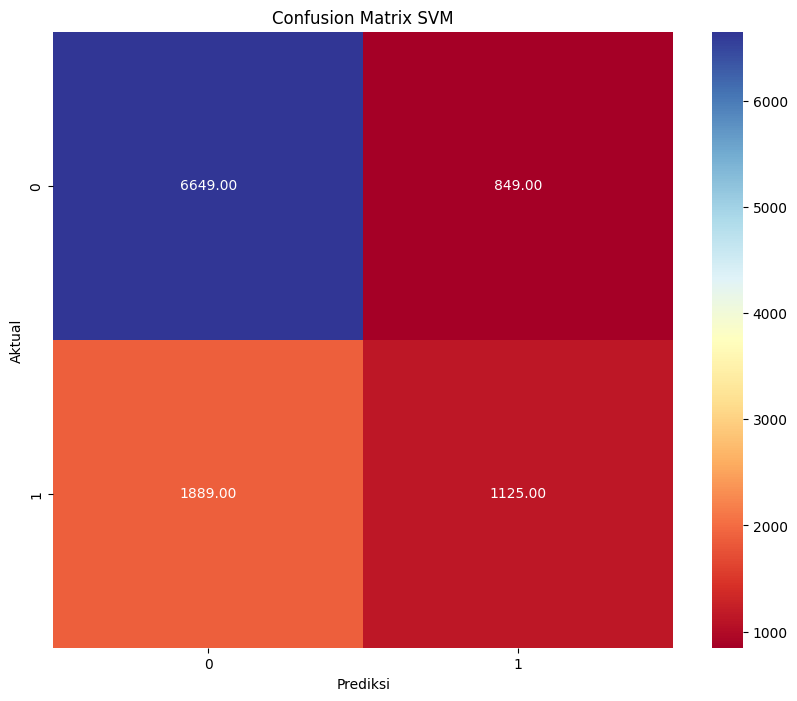

In [32]:
svm_cm = cm(y_test, y_pred)

# Visualisasi Confusion Matrix dengan Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(svm_cm, annot=True, fmt='.2f', cmap='RdYlBu')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix SVM')
plt.show()

#### Evaluasi Klasifikasi Metode Support Vector Classifier

In [33]:
print(cr(y_test, y_pred))

              precision    recall  f1-score   support

     Weekday       0.78      0.89      0.83      7498
     Weekend       0.57      0.37      0.45      3014

    accuracy                           0.74     10512
   macro avg       0.67      0.63      0.64     10512
weighted avg       0.72      0.74      0.72     10512



#### Metode Random Forrest Classifier

In [34]:
X = df.drop(['WeekStatus'], axis=1)
y = df['WeekStatus']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [35]:

rf = RandomForestClassifier(n_estimators=200, random_state=30)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

#### A2. Hasil Prediksi Random Forest Classifier Menggunakan Confusion_Matrix

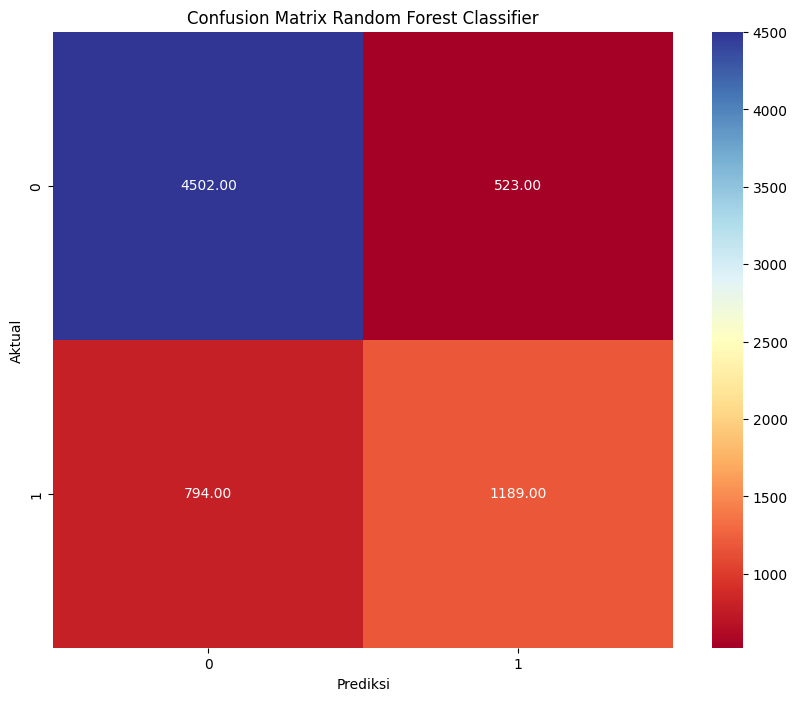

In [36]:
rf_cm = cm(y_test, y_pred)

# Visualisasi Confusion Matrix dengan Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(rf_cm, annot=True, fmt='.2f', cmap='RdYlBu')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Random Forest Classifier')
plt.show()

#### Evaluasi Klasifikasi Metode Random Forest

In [37]:
print(cr(y_test, y_pred))

              precision    recall  f1-score   support

     Weekday       0.85      0.90      0.87      5025
     Weekend       0.69      0.60      0.64      1983

    accuracy                           0.81      7008
   macro avg       0.77      0.75      0.76      7008
weighted avg       0.81      0.81      0.81      7008



#### Metode K-Nearest Neighbors

In [38]:
# Inisialisasi model K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
X = df.drop(['WeekStatus'], axis=1)
y = df['WeekStatus']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [39]:
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

#### A2. Hasil Prediksi KNN Menggunakan Confusion_Matrix

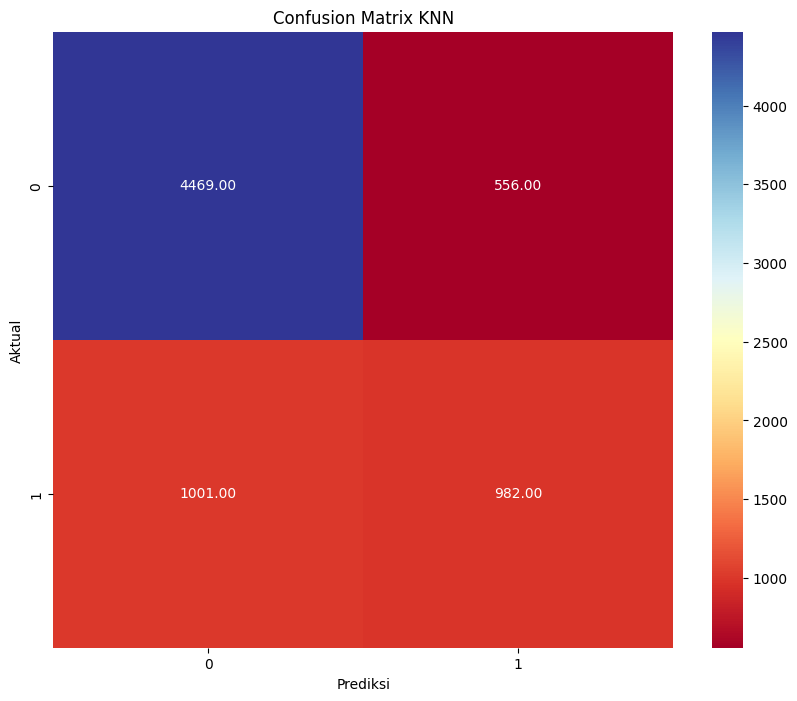

In [40]:
knn_cm = cm(y_test, y_pred)

# Visualisasi Confusion Matrix dengan Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(knn_cm, annot=True, fmt='.2f', cmap='RdYlBu')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix KNN')
plt.show()

#### Evaluasi Klasifikasi Metode KNN

In [41]:
print(cr(y_test, y_pred))

              precision    recall  f1-score   support

     Weekday       0.82      0.89      0.85      5025
     Weekend       0.64      0.50      0.56      1983

    accuracy                           0.78      7008
   macro avg       0.73      0.69      0.70      7008
weighted avg       0.77      0.78      0.77      7008



#### Plotting menggunakan Scatter dari Matplotlib

c:\Users\maula\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


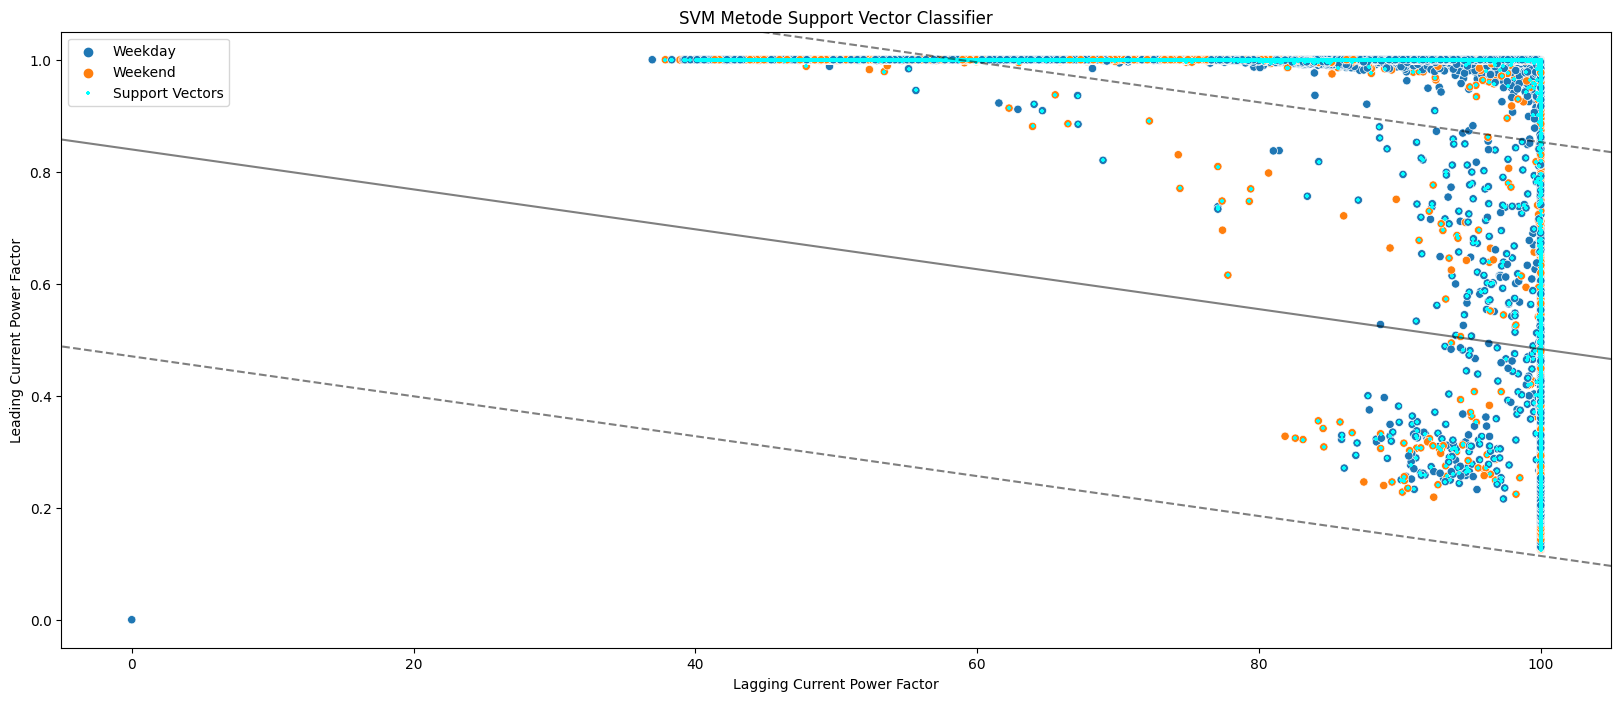

In [42]:
plt.figure(figsize=(20,8))

sns.scatterplot(x='Lagging_Current_Power_Factor', y='Leading_Current_Power_Factor', data=df, hue='WeekStatus')

# Tampilkan Titik-Titik Support Vectors-nya
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=5, color='cyan', marker='+', label='Support Vectors')

# Buat garis Decision Boundary (Ruang Keputusan)
ax = plt.gca() # gca() = "Get Current Axes"
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Buat sebuah meshgrid untuk evaluasi model
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1]), # Linear Space x
np.linspace(ylim[0], ylim[1])) # Linear Space y
Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()]) # Concatenate
Z = Z.reshape(xx.shape) # Reshape titik agar sesuai dengan sumbu x

# Buat grafik Decision Boundary dan garis Marginnya
ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

plt.xlabel('Lagging Current Power Factor')
plt.ylabel('Leading Current Power Factor')
plt.title('SVM Metode Support Vector Classifier')
plt.legend(loc='upper left')
plt.show()

<li>Kesimpulan dari Berbagai Metode Yang telah diuji adalah Random Forest Classifier memiliki akurasi yang lebih baik dibandingkan dengan Support Vector Classifer dan juga KNN, Hal ini bisa terjadi mungkin karena Kemampuan dari Random Forest yang dapat menangani data kategorikal tanpa memerlukan banyak praproses data tambahan seperti encoding.</li>

# B. Unsupervised Learning

#### B1 Implementasi metode K-Means pada dataset

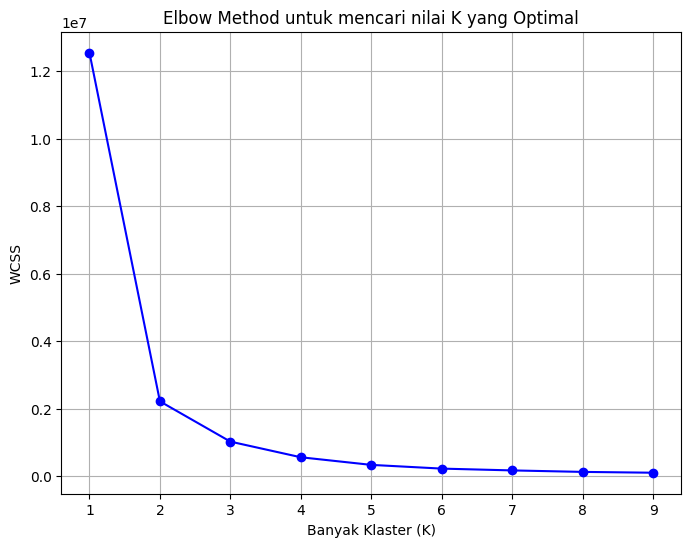

In [43]:
X = df[['Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor']]
wcss = [] # Inisialisasi list untuk menyimpan nilai WCSS tiap kelompok
# Buat loop untuk melatih algoritma K-Means
for k in range(1, 10):
    model = KMeans(n_clusters=k, n_init=10, random_state=0)
    model.fit(X)
    wcss.append(model.inertia_)
# Buat grafik Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 10), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method untuk mencari nilai K yang Optimal')
plt.xlabel('Banyak Klaster (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

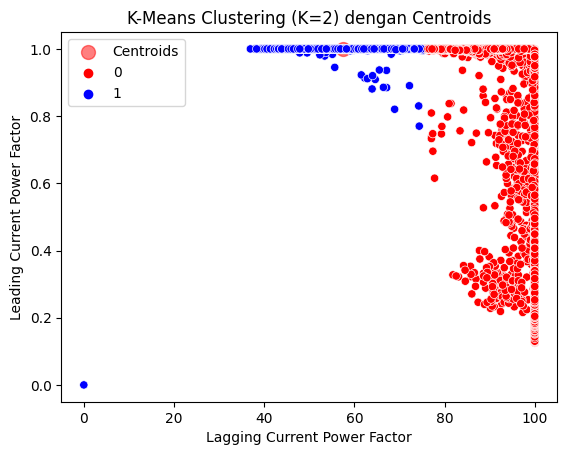

In [44]:
X = df[['Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor']] # Gunakan fitur X
K = 2 # Banyak kelas
kmeans = KMeans(n_clusters=K, n_init=10)

# Latih model K-Means berdasarkan data X
kmeans.fit(X)
cluster_labels = kmeans.labels_ 
df["cluster"] = cluster_labels
centroids = kmeans.cluster_centers_
warna = ["red", "blue",]
plt.scatter(centroids[:, 0], centroids[:, 1], alpha=0.5, c='red', s=100,

label='Centroids')

sns.scatterplot(data=df, x="Lagging_Current_Power_Factor", y="Leading_Current_Power_Factor", hue="cluster", palette=warna)

plt.title(f"K-Means Clustering (K={K}) dengan Centroids")
plt.xlabel("Lagging Current Power Factor")
plt.ylabel("Leading Current Power Factor")
plt.legend()
plt.show()

#### Evaluasi Clustering Tanpa Label Asli

In [45]:
# Silhouette Score
ss_score = silhouette_score(X, df['cluster'])
print(f"Silhouette Score: {ss_score:.2f}")

# Davies-Bouldin Index
db_index = davies_bouldin_score(X, df['cluster'])
print(f"Davies-Bouldin Index: {db_index:.2f}")

# Calinski-Harabasz Index
ch_index = calinski_harabasz_score(X, df['cluster'])
print(f"Calinski-Harabasz Index: {ch_index:.2f}")

Silhouette Score: 0.72
Davies-Bouldin Index: 0.39
Calinski-Harabasz Index: 163322.25


#### Evaluasi Clustering dengan Label Asli

In [46]:
# Buat crosstab untuk membandingkan cluster labels dengan true labels
cross_tab = pd.crosstab(df["cluster"], df["WeekStatus"])
print("Cross-Tabulation:")
print(cross_tab, "\n")

Cross-Tabulation:
WeekStatus  Weekday  Weekend
cluster                     
0             16288     6336
1              8768     3648 



In [47]:
# Adjusted Rand Index (ARI)
ari = adjusted_rand_score(df['cluster'], df['WeekStatus'])
print(f"Adjusted Rand Index (ARI): {ari:.5f}")

# Normalized Mutual Information (NMI)
nmi = normalized_mutual_info_score(df['WeekStatus'], df['cluster'])
print(f"Normalized Mutual Information (NMI): {nmi:.5f}")
# Fungsi HCV-M
homogeneity = homogeneity_score(df['WeekStatus'], df['cluster'])
completeness = completeness_score(df['WeekStatus'], df['cluster'])
v_measure = v_measure_score(df['WeekStatus'], df['cluster'])

print(f"Homogeneity: {homogeneity:.5f}")
print(f"Completeness: {completeness:.5f}")
print(f"V-Measure: {v_measure:.5f}")

Adjusted Rand Index (ARI): 0.00335
Normalized Mutual Information (NMI): 0.00017
Homogeneity: 0.00018
Completeness: 0.00016
V-Measure: 0.00017


#### Plotting Hasil Clustering

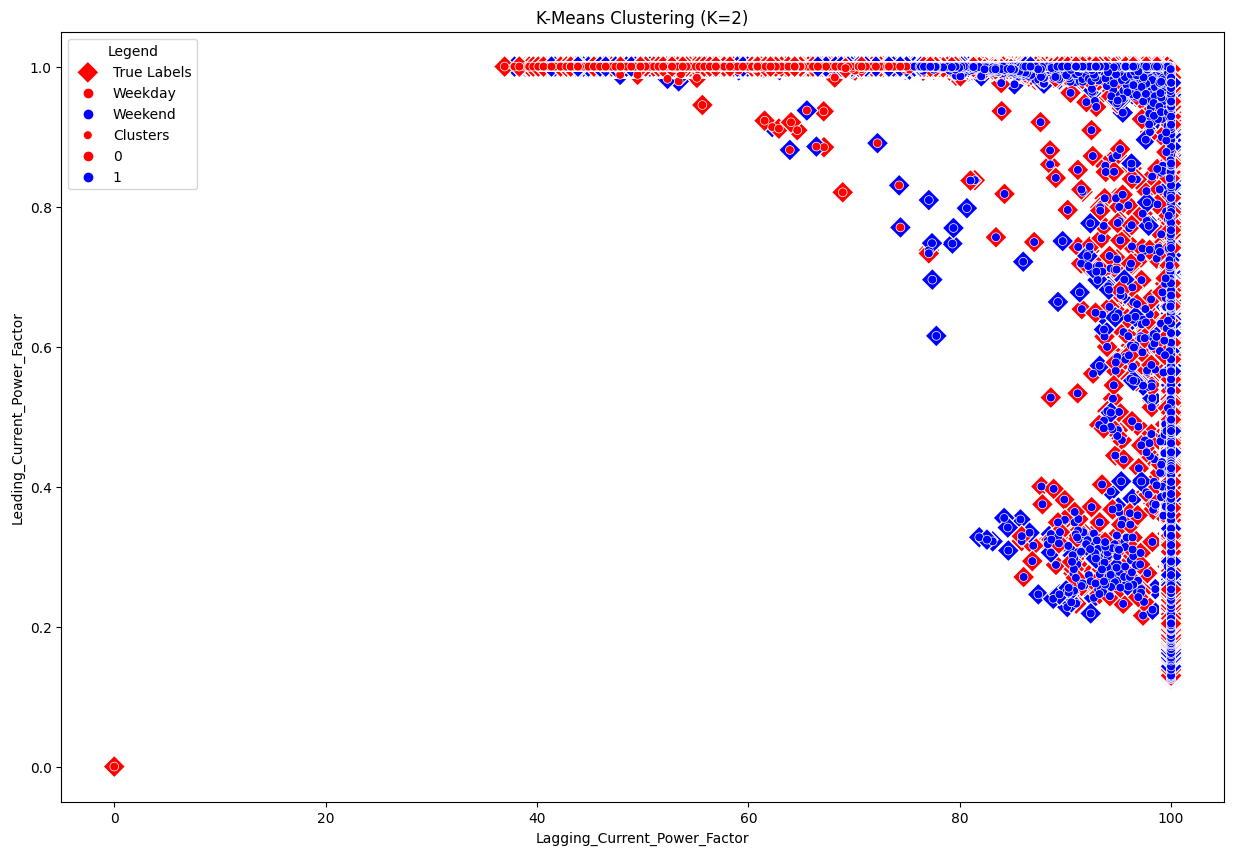

In [49]:
cluster_mapping = {0: 1, 1: 0, 2: 2}
df["cluster2"] = df["cluster"].map(cluster_mapping)

plt.figure(figsize=(15,10))
warna = ["red", "blue"]
sns.scatterplot(df, x='Lagging_Current_Power_Factor', y='Leading_Current_Power_Factor', palette=warna,
                hue=df['WeekStatus'], marker="D", s=130, label="True Labels")


sns.scatterplot(df, x='Lagging_Current_Power_Factor', y='Leading_Current_Power_Factor', palette=warna,
                hue="cluster2", marker="o", s=40, label="Clusters")

plt.title("K-Means Clustering (K=2)")
plt.xlabel('Lagging_Current_Power_Factor')
plt.ylabel('Leading_Current_Power_Factor')
plt.legend(title="Legend", loc="upper left")
plt.show()